# CNN Fashion Mist

## Importing Libraries

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import visualkeras
from keras.utils import plot_model
import math
from keras.optimizers import RMSprop

## Importing Data

In [ ]:
((X, y),(X_test, y_test)) = tf.keras.datasets.fashion_mnist.load_data()

## Data Pre Processing

In [ ]:
#1-hot
from keras.utils.np_utils import to_categorical
y = to_categorical(y,10)
y_test = to_categorical(y_test,10)

In [ ]:
#Normalise
X = X/np.float32(255)
X_test = X_test/np.float32(255)

In [ ]:
print(len(X))
print(len(X_test))

60000
10000


In [ ]:
#Reshape for No of channels
X = X.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [ ]:
print(X.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
#Give the names of each class
class_names = ['T-shirt/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot']

<Figure size 640x480 with 0 Axes>

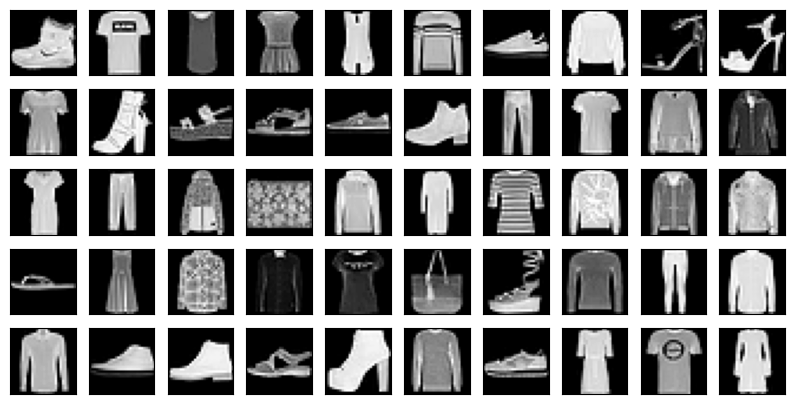

In [ ]:
plt.set_cmap('gist_yarg_r')

#Show clothes images
plt.figure(figsize=(10,5),)
for i in range(0,50):
    plt.subplot(5,10, i+1)
    plt.imshow(X[i])
    plt.xticks([])
    plt.yticks([])

## Model 1

### Create Model

In [ ]:
#Initialise Variables
Img_shape = 28
Num_classes = 10
test_size = 0.25
random_state = 1234
No_epochs = 30
Batch_size = 128

In [ ]:
#Break to train and Validate
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [ ]:
# We are using sequential model which is linear stack of layers. The Sequential model is initialized first and then using add method we add rest of the layers
model = tf.keras.Sequential()

# First layer, which has a 2D Convolutional layer with kernel size as 3x3 and Max pooling operation
model.add(Conv2D(64, (3,3), padding='same', input_shape=(28,28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Second layer, which has a 2D Convolutional layer with kernel size as 3x3 & ReLU activation and Max pooling operation
model.add(Conv2D(32, (3,3), padding='same', activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Fully connected layer with ReLU activation function
model.add(Flatten())
model.add(Dense(64, activation=tf.nn.relu))

# Output layer with softmax activation function
model.add(Dense(10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 64)                1

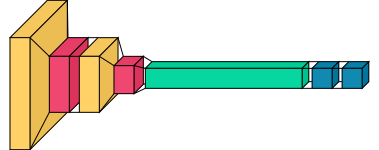

In [ ]:
visualkeras.layered_view(model)

In [ ]:
#plot_model(model, to_file='model.png')

In [ ]:
# Optimizer specified here is adam, loss is categorical crossentrophy and metric is accuracy
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['categorical_accuracy'])

In [ ]:
#Fit the training data to the model
train_model = model.fit(X_train, y_train,
                  batch_size=Batch_size,
                  epochs=No_epochs,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/30
352/352 [==============================] - 8s 8ms/step - loss: 0.5442 - categorical_accuracy: 0.8068 - val_loss: 0.3754 - val_categorical_accuracy: 0.8667
Epoch 2/30
352/352 [==============================] - 2s 6ms/step - loss: 0.3513 - categorical_accuracy: 0.8752 - val_loss: 0.3217 - val_categorical_accuracy: 0.8837
Epoch 3/30
352/352 [==============================] - 3s 8ms/step - loss: 0.3084 - categorical_accuracy: 0.8895 - val_loss: 0.3119 - val_categorical_accuracy: 0.8861
Epoch 4/30
352/352 [==============================] - 4s 10ms/step - loss: 0.2814 - categorical_accuracy: 0.8997 - val_loss: 0.2974 - val_categorical_accuracy: 0.8927
Epoch 5/30
352/352 [==============================] - 3s 10ms/step - loss: 0.2598 - categorical_accuracy: 0.9062 - val_loss: 0.2720 - val_categorical_accuracy: 0.9031
Epoch 6/30
352/352 [==============================] - 3s 10ms/step - loss: 0.2429 - categorical_accuracy: 0.9116 - val_loss: 0.2718 - val_categorical_accuracy: 0.8996
E

### Evaluate Model

In [ ]:
score = model.evaluate(X_test, y_test, steps=math.ceil(10000/32))
# checking the test loss and test accuracy
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.4396 - categorical_accuracy: 0.9077
Test loss: 0.43955883383750916
Test accuracy: 0.9077000021934509


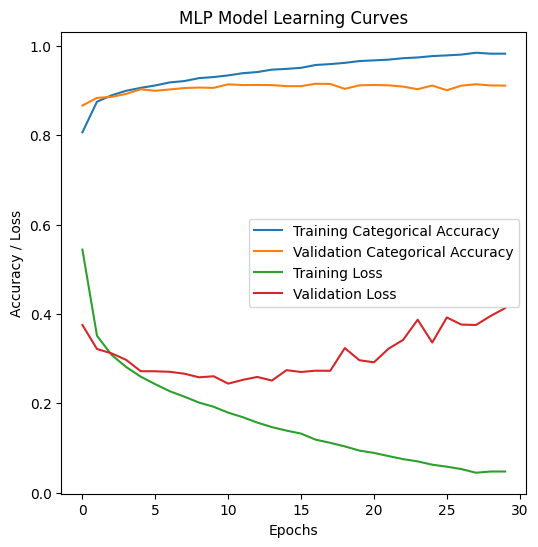

In [ ]:
# Plot the learning curves
plt.figure(figsize=(6, 6))
plt.plot(train_model.history['categorical_accuracy'], label='Training Categorical Accuracy')
plt.plot(train_model.history['val_categorical_accuracy'], label='Validation Categorical Accuracy')
plt.plot(train_model.history['loss'], label='Training Loss')
plt.plot(train_model.history['val_loss'], label='Validation Loss')
plt.title('MLP Model Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()

313/313 [==============================] - 1s 2ms/step


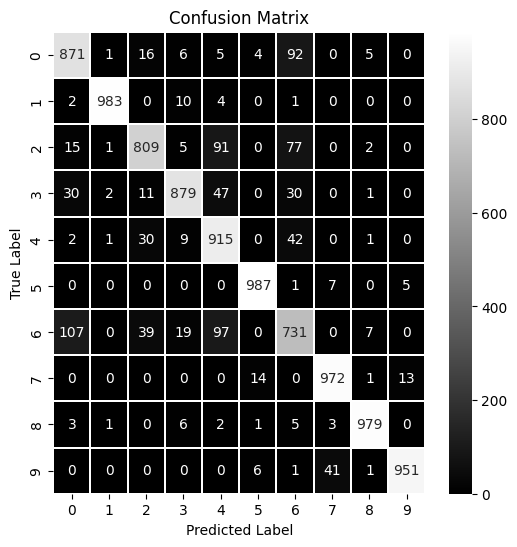

In [ ]:
#Plot Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

f,ax = plt.subplots(figsize = (6,6))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="white", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


## Model 2

### Create Model

Increasing the number of layers and adding dropour to reduce overfiting while maintaining comparable validation accuracy

In [ ]:
#Initialise Variables
Img_shape = 28
Num_classes = 10
test_size = 0.25
random_state = 1234
No_epochs = 30
Batch_size = 128

In [ ]:
model_2 = Sequential()

#Convolution Layer 1
model_2.add(Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_normal', input_shape=(28,28, 1)))
model_2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#Convolution Layer 2
model_2.add(Conv2D(64, 3, padding='same', activation='relu'))
model_2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#Convolution Layer 3
#Add dropout
model_2.add(Dropout(0.25))
#Add Batch Normalisation
model_2.add(BatchNormalization())
model_2.add(Conv2D(128, 3, padding='same', activation='relu'))

#Convolution Layer 4
model_2.add(Conv2D(128, 3, padding='same', activation='relu'))
model_2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#Dense Layer 1
#Add dropout
model_2.add(Dropout(0.25))
#Flattening
model_2.add(Flatten())
#Add Batch Normalisation
model_2.add(BatchNormalization())
model_2.add(Dense(512, activation='relu'))

#Add dropout
model_2.add(Dropout(0.25))
model_2.add(Dense(10, activation='softmax'))

In [ ]:
# Optimizer specified here is adam, loss is categorical crossentrophy and metric is accuracy
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['categorical_accuracy'])

In [ ]:
#Fit the training data to the model
train_model = model_2.fit(X_train, y_train,
                  batch_size=Batch_size,
                  epochs=No_epochs,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/30
352/352 [==============================] - 6s 10ms/step - loss: 0.5532 - categorical_accuracy: 0.8035 - val_loss: 0.5534 - val_categorical_accuracy: 0.7665
Epoch 2/30
352/352 [==============================] - 3s 8ms/step - loss: 0.3604 - categorical_accuracy: 0.8685 - val_loss: 0.2961 - val_categorical_accuracy: 0.8915
Epoch 3/30
352/352 [==============================] - 3s 8ms/step - loss: 0.3128 - categorical_accuracy: 0.8842 - val_loss: 0.2741 - val_categorical_accuracy: 0.8973
Epoch 4/30
352/352 [==============================] - 3s 9ms/step - loss: 0.2818 - categorical_accuracy: 0.8949 - val_loss: 0.2459 - val_categorical_accuracy: 0.9098
Epoch 5/30
352/352 [==============================] - 3s 9ms/step - loss: 0.2618 - categorical_accuracy: 0.9026 - val_loss: 0.2469 - val_categorical_accuracy: 0.9073
Epoch 6/30
352/352 [==============================] - 3s 8ms/step - loss: 0.2432 - categorical_accuracy: 0.9097 - val_loss: 0.2424 - val_categorical_accuracy: 0.9117
Epo

### Evaluate Model

In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 28, 28, 32)        320       
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 14, 14, 32)        0         
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 14, 14, 64)        18496     
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 7, 7, 64)          0         
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 7, 7, 64)          0         
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 7, 7, 64)          256       
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 7, 7, 128)         7

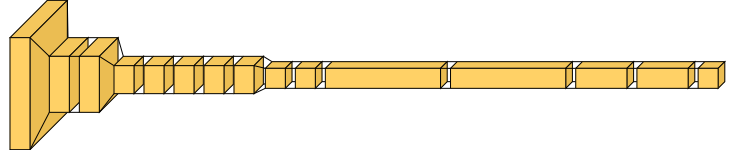

In [ ]:
import visualkeras
visualkeras.layered_view(model_2)

In [ ]:
#plot_model(model_2)

In [ ]:
score = model_2.evaluate(X_test, y_test, steps=math.ceil(10000/32))
# checking the test loss and test accuracy
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.2342 - categorical_accuracy: 0.9230
Test loss: 0.23418362438678741
Test accuracy: 0.9229999780654907


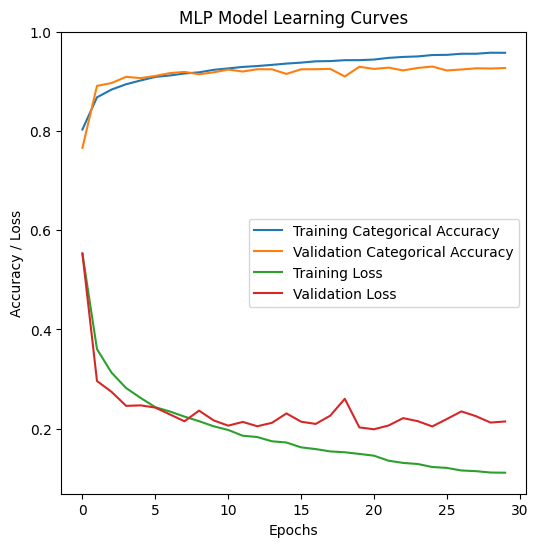

In [ ]:
# Plot the learning curves
plt.figure(figsize=(6, 6))
plt.plot(train_model.history['categorical_accuracy'], label='Training Categorical Accuracy')
plt.plot(train_model.history['val_categorical_accuracy'], label='Validation Categorical Accuracy')
plt.plot(train_model.history['loss'], label='Training Loss')
plt.plot(train_model.history['val_loss'], label='Validation Loss')
plt.title('MLP Model Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()

## Model 3

### Create Model

Attempting to increase validation accuracy by simplyfing the model

In [ ]:
#Initialise Variables
Img_shape = 28
Num_classes = 10
test_size = 0.25
random_state = 1234
No_epochs = 100
Batch_size = 128

In [ ]:
model_3 = Sequential()

#Convolution Layer 1
model_3.add(Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_normal', input_shape=(28,28, 1)))
model_3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#Convolution Layer 2
model_3.add(Dropout(0.25))
model_3.add(Conv2D(64, 3, padding='same', activation='relu'))
model_3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#Convolution Layer 3
model_3.add(Dropout(0.3))
model_3.add(Conv2D(128, 3, padding='same', activation='relu'))
model_3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#Dense Layer 1
model_3.add(Dropout(0.3))
model_3.add(Flatten())
model_3.add(BatchNormalization())
model_3.add(Dense(128, activation='relu'))

#Softmax
model_3.add(Dropout(0.1))
model_3.add(Dense(10, activation='softmax'))

In [ ]:
# Optimizer specified here is adam, loss is categorical crossentrophy and metric is accuracy
model_3.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['categorical_accuracy'])

In [ ]:
#Fit the training data to the model
train_model = model_3.fit(X_train, y_train,
                  batch_size=Batch_size,
                  epochs=No_epochs,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/100
352/352 [==============================] - 4s 8ms/step - loss: 0.6811 - categorical_accuracy: 0.7497 - val_loss: 0.4490 - val_categorical_accuracy: 0.8369
Epoch 2/100
352/352 [==============================] - 2s 7ms/step - loss: 0.4264 - categorical_accuracy: 0.8420 - val_loss: 0.3436 - val_categorical_accuracy: 0.8719
Epoch 3/100
352/352 [==============================] - 2s 7ms/step - loss: 0.3617 - categorical_accuracy: 0.8633 - val_loss: 0.2987 - val_categorical_accuracy: 0.8883
Epoch 4/100
352/352 [==============================] - 3s 9ms/step - loss: 0.3272 - categorical_accuracy: 0.8802 - val_loss: 0.2983 - val_categorical_accuracy: 0.8871
Epoch 5/100
352/352 [==============================] - 3s 7ms/step - loss: 0.3059 - categorical_accuracy: 0.8851 - val_loss: 0.2809 - val_categorical_accuracy: 0.8953
Epoch 6/100
352/352 [==============================] - 2s 7ms/step - loss: 0.2876 - categorical_accuracy: 0.8941 - val_loss: 0.2711 - val_categorical_accuracy: 0.898

### Evaluate Model

In [ ]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_15 (ModuleWra (None, 28, 28, 32)        320       
_________________________________________________________________
module_wrapper_16 (ModuleWra (None, 14, 14, 32)        0         
_________________________________________________________________
module_wrapper_17 (ModuleWra (None, 14, 14, 32)        0         
_________________________________________________________________
module_wrapper_18 (ModuleWra (None, 14, 14, 64)        18496     
_________________________________________________________________
module_wrapper_19 (ModuleWra (None, 7, 7, 64)          0         
_________________________________________________________________
module_wrapper_20 (ModuleWra (None, 7, 7, 64)          0         
_________________________________________________________________
module_wrapper_21 (ModuleWra (None, 7, 7, 128)        

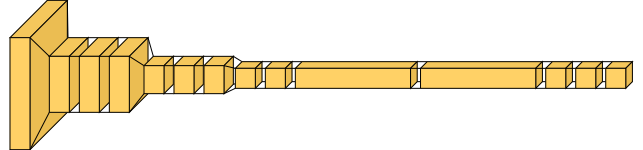

In [ ]:
visualkeras.layered_view(model_3)

In [ ]:
score = model_3.evaluate(X_test, y_test, steps=math.ceil(10000/32))
# checking the test loss and test accuracy
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.2371 - categorical_accuracy: 0.9279
Test loss: 0.23708762228488922
Test accuracy: 0.9279000163078308


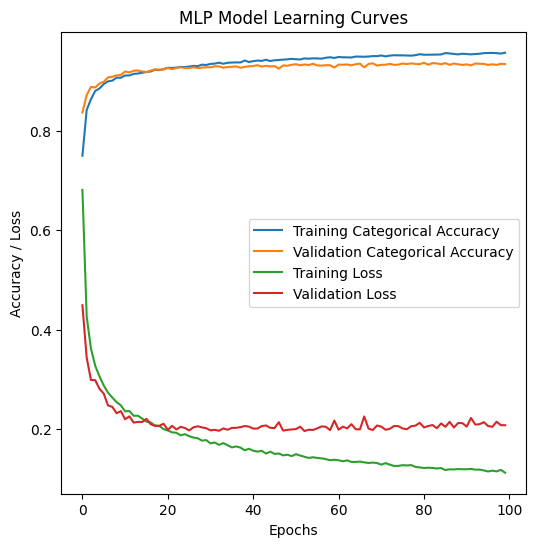

In [ ]:
# Plot the learning curves
plt.figure(figsize=(6, 6))
plt.plot(train_model.history['categorical_accuracy'], label='Training Categorical Accuracy')
plt.plot(train_model.history['val_categorical_accuracy'], label='Validation Categorical Accuracy')
plt.plot(train_model.history['loss'], label='Training Loss')
plt.plot(train_model.history['val_loss'], label='Validation Loss')
plt.title('MLP Model Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()

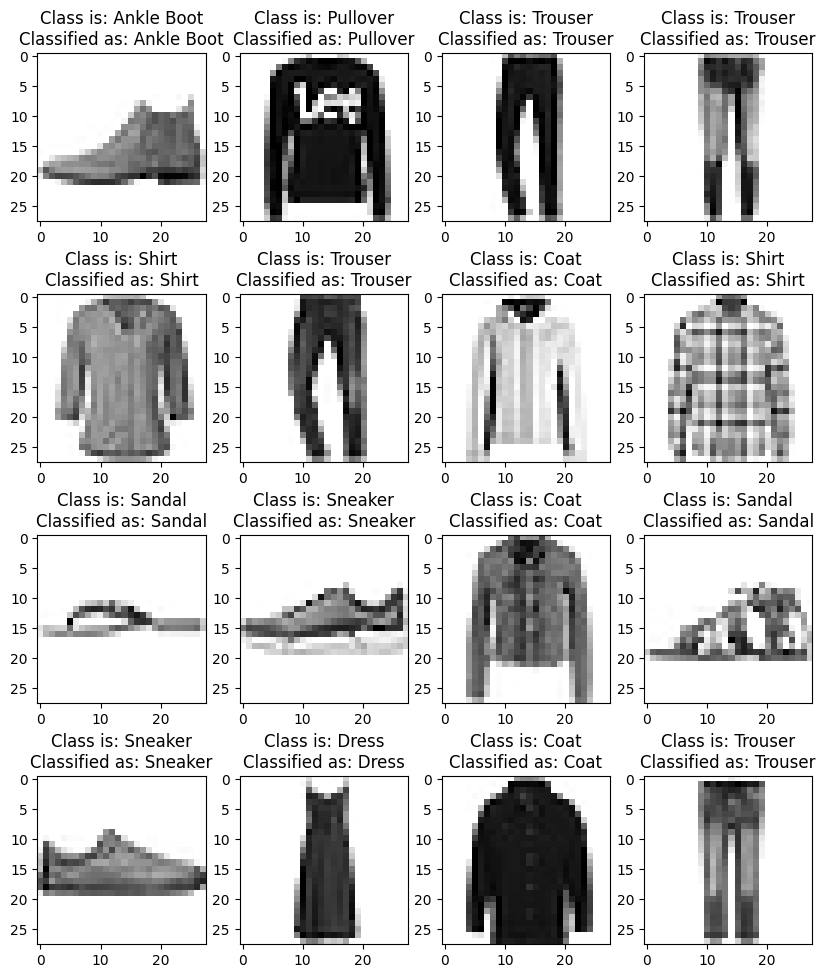

In [ ]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

y_pred = model_3.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(10, 12))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Class is: {labels[y_test[i].argmax()]}\nClassified as: {labels[y_pred[i].argmax()]}");

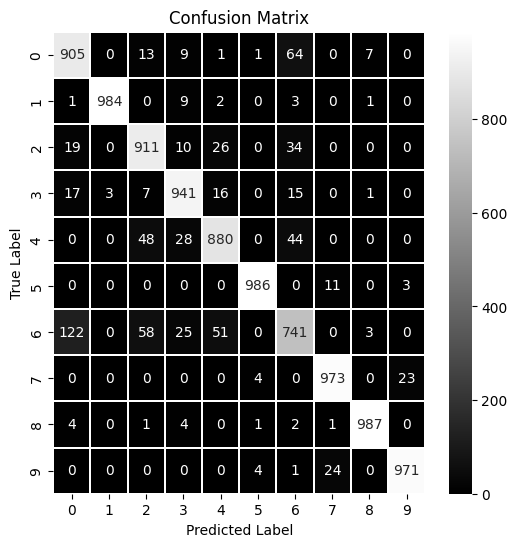

In [ ]:
y_pred = model_3.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

f,ax = plt.subplots(figsize = (6,6))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="white", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Model 4

### Create Model

Can a model with half parameters achive similar accuracy?

In [ ]:
#Initialise VariablesImg_shape = 28
Num_classes = 10
test_size = 0.25
random_state = 1234
No_epochs = 100
Batch_size = 128

In [ ]:
model_4 = Sequential()

#Convolution Layer 1
model_4.add(Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_normal', input_shape=(28,28, 1)))
model_4.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#Convolution Layer 2
model_4.add(Dropout(0.1))
model_4.add(Conv2D(32, 3, padding='same', activation='relu'))
model_4.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#Convolution Layer 3
model_4.add(Dropout(0.2))
model_4.add(Conv2D(64, 3, padding='same', activation='relu'))
model_4.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#Convolution Layer 4
model_4.add(Dropout(0.3))
model_4.add(Conv2D(128, 3, padding='same', activation='relu'))
model_4.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#Dense
model_4.add(Dropout(0.3))
model_4.add(Flatten())
model_4.add(BatchNormalization())
model_4.add(Dense(128, activation='relu'))

#Softmax
model_4.add(Dropout(0.1))
model_4.add(Dense(10, activation='softmax'))

In [ ]:
# Optimizer specified here is adam, loss is categorical crossentrophy and metric is accuracy
model_4.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['categorical_accuracy'])

In [ ]:
#Fit the training data to the model
train_model = model_4.fit(X_train, y_train,
                  batch_size=Batch_size,
                  epochs=No_epochs,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/100
352/352 [==============================] - 4s 8ms/step - loss: 0.8084 - categorical_accuracy: 0.7008 - val_loss: 0.4628 - val_categorical_accuracy: 0.8345
Epoch 2/100
352/352 [==============================] - 2s 7ms/step - loss: 0.4789 - categorical_accuracy: 0.8229 - val_loss: 0.3754 - val_categorical_accuracy: 0.8599
Epoch 3/100
352/352 [==============================] - 3s 7ms/step - loss: 0.4135 - categorical_accuracy: 0.8483 - val_loss: 0.3173 - val_categorical_accuracy: 0.8804
Epoch 4/100
352/352 [==============================] - 2s 7ms/step - loss: 0.3714 - categorical_accuracy: 0.8649 - val_loss: 0.3079 - val_categorical_accuracy: 0.8859
Epoch 5/100
352/352 [==============================] - 2s 6ms/step - loss: 0.3432 - categorical_accuracy: 0.8749 - val_loss: 0.2752 - val_categorical_accuracy: 0.8967
Epoch 6/100
352/352 [==============================] - 2s 6ms/step - loss: 0.3280 - categorical_accuracy: 0.8805 - val_loss: 0.2672 - val_categorical_accuracy: 0.900

### Evaluate Model

In [ ]:
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_29 (ModuleWra (None, 28, 28, 32)        320       
_________________________________________________________________
module_wrapper_30 (ModuleWra (None, 14, 14, 32)        0         
_________________________________________________________________
module_wrapper_31 (ModuleWra (None, 14, 14, 32)        0         
_________________________________________________________________
module_wrapper_32 (ModuleWra (None, 14, 14, 32)        9248      
_________________________________________________________________
module_wrapper_33 (ModuleWra (None, 7, 7, 32)          0         
_________________________________________________________________
module_wrapper_34 (ModuleWra (None, 7, 7, 32)          0         
_________________________________________________________________
module_wrapper_35 (ModuleWra (None, 7, 7, 64)         

In [ ]:
score = model_4.evaluate(X_test, y_test, steps=math.ceil(10000/32))
# checking the test loss and test accuracy
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.2060 - categorical_accuracy: 0.9281
Test loss: 0.20596963167190552
Test accuracy: 0.9280999898910522


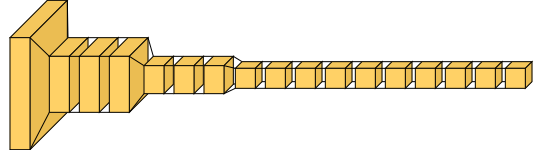

In [ ]:
visualkeras.layered_view(model_4)

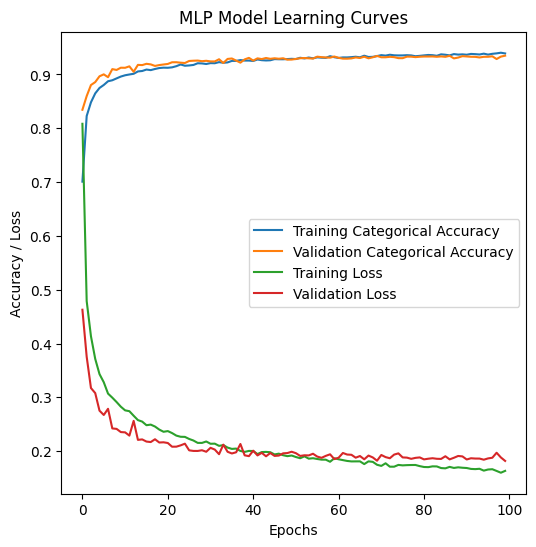

In [ ]:
# Plot the learning curves
plt.figure(figsize=(6, 6))
plt.plot(train_model.history['categorical_accuracy'], label='Training Categorical Accuracy')
plt.plot(train_model.history['val_categorical_accuracy'], label='Validation Categorical Accuracy')
plt.plot(train_model.history['loss'], label='Training Loss')
plt.plot(train_model.history['val_loss'], label='Validation Loss')
plt.title('MLP Model Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()

## Judge models

In [ ]:
score1 = model.evaluate(X_test, y_test, steps=math.ceil(10000/32))
score2 = model_2.evaluate(X_test, y_test, steps=math.ceil(10000/32))
score3 = model_3.evaluate(X_test, y_test, steps=math.ceil(10000/32))
score4 = model_4.evaluate(X_test, y_test, steps=math.ceil(10000/32))

import pandas as pd

model_loss = {'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4'],
        'Loss': [score1[0], score2[0], score3[0], score4[0]]}
df1 = pd.DataFrame(model_loss)


model_accuracy = {'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4'],
        'Categorical accuracy': [score1[1], score2[1], score3[1], score4[1]]}
df2 = pd.DataFrame(model_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.2060 - categorical_accuracy: 0.9281


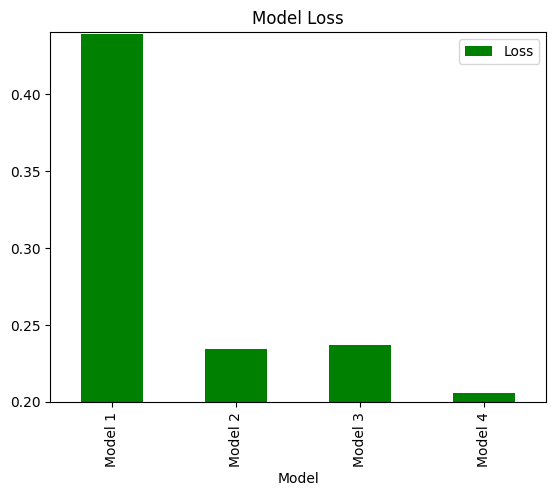

In [ ]:
df1.plot(kind='bar',
        x='Model',
        y='Loss',
        color='green')
plt.title('Model Loss')
plt.ylim(0.2, max(df1['Loss']) + 0.001)
plt.show()

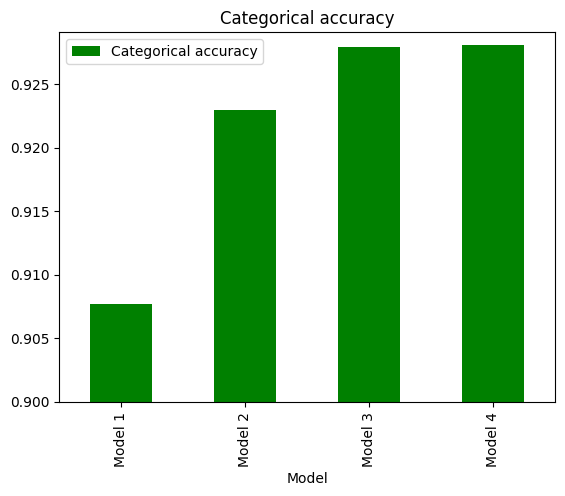

In [ ]:
df2.plot(kind='bar', x='Model', y='Categorical accuracy', color='green')
plt.title('Categorical accuracy')
plt.ylim(0.9, max(df2['Categorical accuracy']) + 0.001)
plt.show()

Model 3 seems to be the best by only a small margin as Model 4 is both lighter and achives a smaller loss

## Model 3 with different batch sizes

### Smaller batch size

In [ ]:
#Initialise Variables
Img_shape = 28
Num_classes = 10
test_size = 0.25
random_state = 1234
No_epochs = 100
Batch_size = 32

In [ ]:
model_3 = Sequential()

#Convolution Layer 1
model_3.add(Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_normal', input_shape=(28,28, 1)))
model_3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#Convolution Layer 2
model_3.add(Dropout(0.25))
model_3.add(Conv2D(64, 3, padding='same', activation='relu'))
model_3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


#Convolution Layer 3
model_3.add(Dropout(0.3))
model_3.add(Conv2D(128, 3, padding='same', activation='relu'))
model_3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#Dense Layer 1
model_3.add(Dropout(0.3))
model_3.add(Flatten())
model_3.add(BatchNormalization())
model_3.add(Dense(128, activation='relu'))

#Softmax
model_3.add(Dropout(0.1))
model_3.add(Dense(10, activation='softmax'))

In [ ]:
# Optimizer specified here is adam, loss is categorical crossentrophy and metric is accuracy
model_3.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['categorical_accuracy'])

In [ ]:
#Fit the training data to the model
train_model = model_3.fit(X_train, y_train,
                  batch_size=Batch_size,
                  epochs=No_epochs,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/100
1407/1407 [==============================] - 10s 6ms/step - loss: 0.6284 - categorical_accuracy: 0.7677 - val_loss: 0.4032 - val_categorical_accuracy: 0.8411
Epoch 2/100
1407/1407 [==============================] - 7s 5ms/step - loss: 0.4207 - categorical_accuracy: 0.8421 - val_loss: 0.3228 - val_categorical_accuracy: 0.8780
Epoch 3/100
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3753 - categorical_accuracy: 0.8600 - val_loss: 0.2870 - val_categorical_accuracy: 0.8899
Epoch 4/100
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3405 - categorical_accuracy: 0.8747 - val_loss: 0.2725 - val_categorical_accuracy: 0.8962
Epoch 5/100
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3199 - categorical_accuracy: 0.8806 - val_loss: 0.2650 - val_categorical_accuracy: 0.9017
Epoch 6/100
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3115 - categorical_accuracy: 0.8846 - val_loss: 0.2781 - val_categorical_ac

In [ ]:
score = model_3.evaluate(X_test, y_test, steps=math.ceil(10000/32))
# checking the test loss and test accuracy
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.2049 - categorical_accuracy: 0.9320
Test loss: 0.20488974452018738
Test accuracy: 0.9319999814033508


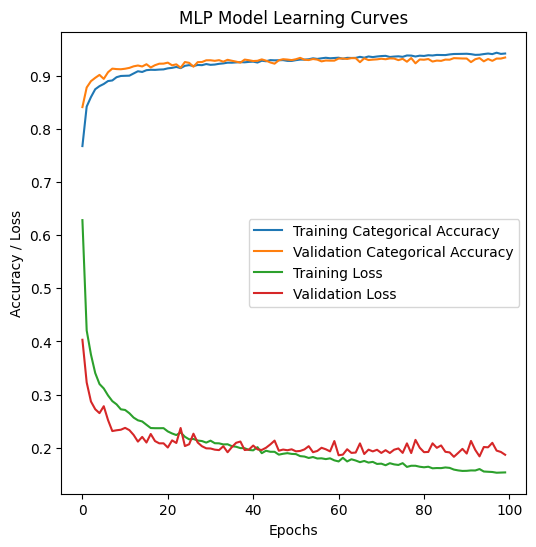

In [ ]:
# Plot the learning curves
plt.figure(figsize=(6, 6))
plt.plot(train_model.history['categorical_accuracy'], label='Training Categorical Accuracy')
plt.plot(train_model.history['val_categorical_accuracy'], label='Validation Categorical Accuracy')
plt.plot(train_model.history['loss'], label='Training Loss')
plt.plot(train_model.history['val_loss'], label='Validation Loss')
plt.title('MLP Model Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()

Any difference is random and most times is worse.

### Larger Batch size

In [ ]:
#Initialise Variables
Img_shape = 28
Num_classes = 10
test_size = 0.25
random_state = 1234
No_epochs = 100
Batch_size = 1024

In [ ]:
model_3 = Sequential()

#Convolution Layer 1
model_3.add(Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_normal', input_shape=(28,28, 1)))
model_3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#Convolution Layer 2
model_3.add(Dropout(0.25))
model_3.add(Conv2D(64, 3, padding='same', activation='relu'))
model_3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


#Convolution Layer 3
model_3.add(Dropout(0.3))
model_3.add(Conv2D(128, 3, padding='same', activation='relu'))
model_3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#Dense Layer 1
model_3.add(Dropout(0.3))
model_3.add(Flatten())
model_3.add(BatchNormalization())
model_3.add(Dense(128, activation='relu'))

#Softmax
model_3.add(Dropout(0.1))
model_3.add(Dense(10, activation='softmax'))

In [ ]:
# Optimizer specified here is adam, loss is categorical crossentrophy and metric is accuracy
model_3.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['categorical_accuracy'])

In [ ]:
#Fit the training data to the model
train_model = model_3.fit(X_train, y_train,
                  batch_size=Batch_size,
                  epochs=No_epochs,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/100
44/44 [==============================] - 4s 59ms/step - loss: 1.0298 - categorical_accuracy: 0.6269 - val_loss: 1.0205 - val_categorical_accuracy: 0.7719
Epoch 2/100
44/44 [==============================] - 2s 38ms/step - loss: 0.5976 - categorical_accuracy: 0.7757 - val_loss: 0.7347 - val_categorical_accuracy: 0.8125
Epoch 3/100
44/44 [==============================] - 2s 36ms/step - loss: 0.5025 - categorical_accuracy: 0.8139 - val_loss: 0.5728 - val_categorical_accuracy: 0.8337
Epoch 4/100
44/44 [==============================] - 2s 36ms/step - loss: 0.4501 - categorical_accuracy: 0.8324 - val_loss: 0.4515 - val_categorical_accuracy: 0.8600
Epoch 5/100
44/44 [==============================] - 2s 36ms/step - loss: 0.4105 - categorical_accuracy: 0.8471 - val_loss: 0.3918 - val_categorical_accuracy: 0.8675
Epoch 6/100
44/44 [==============================] - 2s 36ms/step - loss: 0.3859 - categorical_accuracy: 0.8572 - val_loss: 0.3557 - val_categorical_accuracy: 0.8738
Epoc

In [ ]:
score = model_3.evaluate(X_test, y_test, steps=math.ceil(10000/32))
# checking the test loss and test accuracy
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.2310 - categorical_accuracy: 0.9310
Test loss: 0.23103801906108856
Test accuracy: 0.9309999942779541


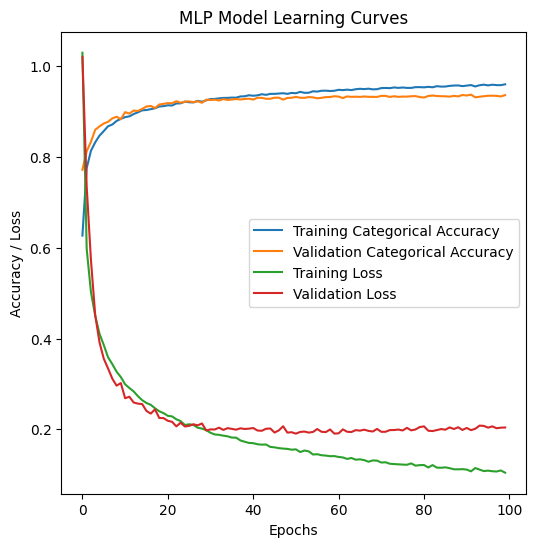

In [ ]:
# Plot the learning curves
plt.figure(figsize=(6, 6))
plt.plot(train_model.history['categorical_accuracy'], label='Training Categorical Accuracy')
plt.plot(train_model.history['val_categorical_accuracy'], label='Validation Categorical Accuracy')
plt.plot(train_model.history['loss'], label='Training Loss')
plt.plot(train_model.history['val_loss'], label='Validation Loss')
plt.title('MLP Model Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()

Faster to train. But the results are similar. And again some times better and at this instance a little bit worse.